<a href="https://colab.research.google.com/github/shtomar-adb/CMPE-255-Assignment1-Data-Cleaning/blob/main/cmpe255_assignment1_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CMPE 255: Data Mining Assignment 1 (Data Cleaning)

**Business Objective**  
Predict the prices of airbnb rentals in NYC.  
This assignment uses the airbnb NYC 2019 rental prices data set and applies Linear Regression on selected attributes to create a regression model that could be used for predicting the rental prices.

**Data Set:**  
The dataset chosen for this assignment is the open dataset provided by Airbnb on the New York Airbnb rentals in the year 2019.   
URL to the dataset: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

In [1]:
#Importing Python packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

The datset csv file is uploaded to the Google Drive and will be loaded from there using the Pandas package. The uploaded dataset in the Google drive has read only public access.  
URL: https://drive.google.com/file/d/1ojblpT0e6fpC3PHuUgEo1XiVHNSI_gTI/view?usp=sharing

In [2]:
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/MyDrive/CMPE255/Data sets/AB_NYC_2019.csv')

Mounted at /content/drive/


__Exploratory Data Analysis (EDA)__  
Plotting the count of few prices


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


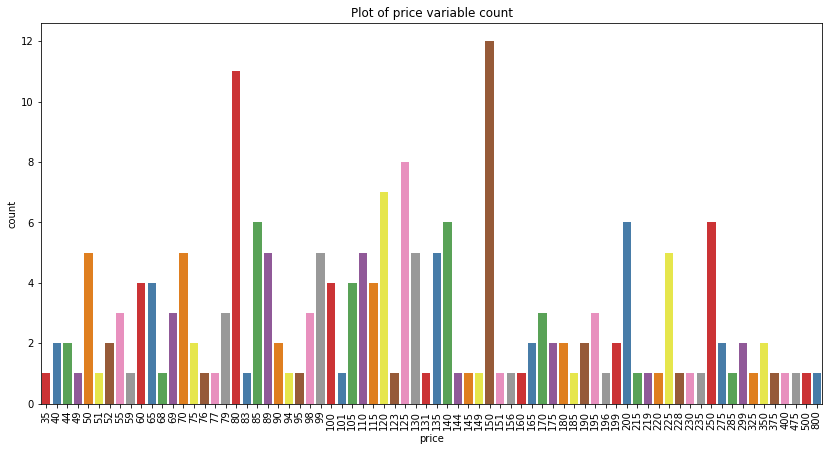

In [3]:
plt.rcParams['figure.figsize'] = 14,7
sns.countplot(df['price'][:200], palette='Set1')
plt.title('Plot of price variable count')
plt.xticks(rotation = 90)
plt.show()


__Step 1: Printing the structure and metadata of dataset__

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
# Dataset has 16 attributes and 48895 data points
df.shape

(48895, 16)

In [7]:
# Printing the columns name
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Step 2: Label encoding the columns which have categorical values**.   
These columns are: 
- neighbourhood_group
- room_type

In [8]:
# Priting room_type value counts
df['room_type'].value_counts()


Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [9]:
# Printing neighbourhood_group value counts
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [10]:
# Performing label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['neighbourhood_group'] = le.fit_transform(df['neighbourhood_group'])
df['room_type'] = le.fit_transform(df['room_type'])

In [11]:
# Printing updated data frame with encoded label
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,1,Kensington,40.64749,-73.97237,1,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,2,Midtown,40.75362,-73.98377,0,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,2,Harlem,40.80902,-73.94190,1,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,1,Clinton Hill,40.68514,-73.95976,0,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,2,East Harlem,40.79851,-73.94399,0,80,10,9,2018-11-19,0.10,1,0


__Step 3: Removing the columns that are not required for Regression algorithm__  
For Regression algorithm we don't need the following columns
- 'name'
- 'id'
- 'host_id'
- 'host_name'
- 'last_review' 
- 'neighbourhood'. 
So we can drop these columns.

In [12]:
# Dropping non required columns
df.drop(columns=['id','name','host_id','host_name', 'last_review', 'neighbourhood'], inplace=True)
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,2,40.80902,-73.94190,1,150,3,0,NaN,1,365
3,1,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,2,40.79851,-73.94399,0,80,10,9,0.10,1,0


__Step 4: Handling NA values in the data frame__

In [13]:
df.isnull().sum()

neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

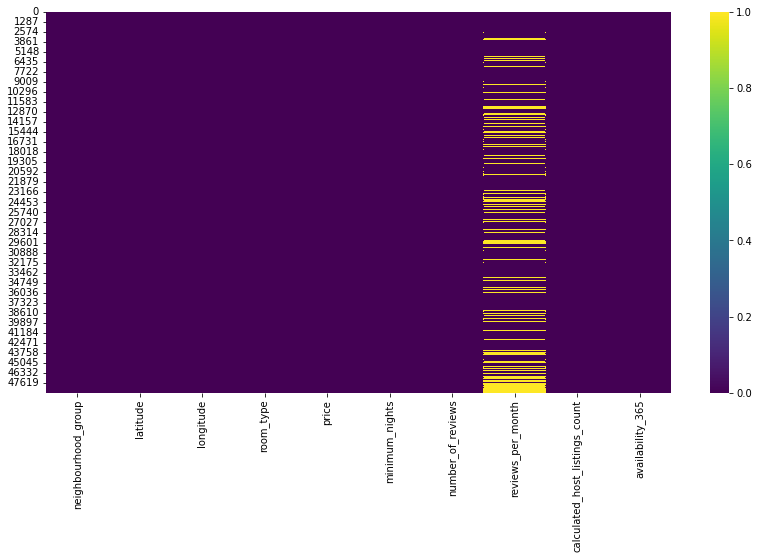

In [14]:
# Heapmap for null values. In the heat map yellow line shows the missing value.
sns.heatmap(df.isnull(), cmap='viridis')

__Step 5: Missing Value handling__:  
To fill the missing values, the mean of all other values is used. The missing values under attribute _reviews_per_month_ will be filled by the mean of all other values under _reviews_per_month_.

In [15]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mean())
# Printing the na values count after filling it with mean value.
df.isnull().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

__Step 6: Splitting data set into independent and dependent features. Regression model will be trained using the independent features to predict the value for dependent feature__

In [16]:
X = df.drop(['price'], axis=1) # Independent attributes
Y = df['price'] # Dependent attributes

__Step 7: Train test split__

In [ ]:
# Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
print("Shape of X train: "+str(list(x_train.shape)))
print("Shape of Y train: " +str(list(y_train.shape)))
print("Shape of X test: "+str(list(x_test.shape)))
print("Shape of Y test: " +str(list(y_test.shape)))
x_train.head()

__Step 8: Normalizing the values__

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train

array([[ 1.81015954, -0.67606308,  4.51480944, ...,  0.63164144,
        -0.18648156,  1.13782241],
       [-0.91821304, -1.2538904 , -0.92015204, ..., -0.15103307,
        -0.18648156, -0.7680181 ],
       [ 0.44597325,  0.24614637, -0.47874825, ..., -0.86737924,
        -0.18648156, -0.85913398],
       ...,
       [ 0.44597325,  0.99754229, -0.46565669, ..., -0.6882927 ,
        -0.06575202,  1.12263643],
       [ 0.44597325,  0.84876921, -0.60049976, ..., -0.82758223,
        -0.18648156, -0.843948  ],
       [ 1.81015954,  0.32512468,  0.14899209, ..., -0.89391058,
        -0.18648156, -0.85913398]])

__Step 9: Training a Linear Regression model__

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
prediction = linear_regression.predict(x_test)

# Finding R squared score
r2_score = r2_score(y_test, prediction)
print("R Square score", r2_score*100)

R Square score 12.071144240000532
